## Problem Understanding and Definition
<b>Number of attributes:</b> 4,233 rows and 25 columns 

<b><u>Feature Information:</b></u>
* <b>name</b> - player's name
* <b>pos</b> - player's position
* <b>height</b> - player's height
* <b>weight</b> - player's weight
* <b>year</b> - basketball season year
* <b>age</b> - player's age
* <b>g</b> - games played
* <b>mp</b> - minutes played
* <b>fg</b> - fields goal
* <b>fga</b> - fields goal attempted
* <b>3p</b> - 3-point field goal
* <b>3pa</b> - 3-point field goal attempted
* <b>2p</b> - 2-point field goal
* <b>2pa</b> - 2-point field goal attempted
* <b>ft</b> - free throws
* <b>fta</b> - free throws attempted
* <b>orb</b> - offensive rebounds
* <b>drb</b> - defensive rebounds
* <b>trb</b> - total rebounds
* <b>ast</b> - assists
* <b>stl</b> - steals
* <b>blk</b> - blocks
* <b>tov</b> - turnovers
* <b>pf</b> - personal fouls
* <b>pts</b> - total points per game

### Goal: 
Predict players' position (Guard, Forward, or Center) based on their stats.

In [25]:
# loading important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [26]:
# reading the dataset
DATA_DIR = 'archive/'
FILE_NAME = 'nba_player_stats.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
nba = pd.read_csv(data_path, index_col=[0])

In [27]:
nba.shape

(4233, 25)

In [28]:
nba.head()

,name,pos,height,weight,year,age,g,mp,fg,fga,...,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts
835,D.C. Wilcutt,G,74.0,165.0,1950.0,26.0,37.0,0.0,0.600000,2.000000,...,1.100000,0.0,0.0,0.0,1.300000,0.0,0.0,0.0,0.7,2.100000
321,Bill Roberts,C,81.0,210.0,1950.0,24.0,67.0,0.0,1.100000,3.300000,...,0.600000,0.0,0.0,0.0,0.400000,0.0,0.0,0.0,1.3,2.700000
2801,Marshall Hawkins,F,75.0,205.0,1950.0,25.0,39.0,0.0,1.400000,5.000000,...,1.600000,0.0,0.0,0.0,1.300000,0.0,0.0,0.0,2.2,3.900000
1402,Floyd Volker,C,76.0,205.0,1950.0,28.0,36.0,0.0,2.633333,8.566667,...,2.166667,0.0,0.0,0.0,1.766667,0.0,0.0,0.0,2.9,6.466667
2812,Marv Schatzman,F,77.0,200.0,1950.0,22.0,34.0,0.0,1.300000,5.100000,...,1.500000,0.0,0.0,0.0,1.100000,0.0,0.0,0.0,1.4,3.400000


In [29]:
nba.describe()

,height,weight,year,age,g,mp,fg,fga,3p,3pa,...,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,...,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000
mean,78.237562,210.256556,1993.497165,24.852104,38.933482,14.586394,2.196317,5.174731,0.259596,0.787343,...,1.552494,0.654666,1.526175,2.644077,1.316389,0.416283,0.240283,0.754776,1.650428,5.764594
std,3.492031,25.626373,20.939592,2.606486,22.245013,8.703500,1.625519,3.457035,0.458043,1.257092,...,1.229299,0.668851,1.452578,2.027571,1.259146,0.387711,0.338874,0.694584,0.820963,4.283616
min,63.000000,70.000000,1950.000000,18.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.100000,190.000000,1978.714286,23.000000,19.500000,7.700000,1.000000,2.600000,0.000000,0.000000,...,0.700000,0.133333,0.466667,1.200000,0.466667,0.100000,0.000000,0.100000,1.000000,2.600000
50%,79.000000,210.000000,1996.500000,24.500000,41.000000,13.325000,1.766667,4.300000,0.000000,0.100000,...,1.215385,0.500000,1.200000,2.128571,0.940000,0.350000,0.125000,0.650000,1.600000,4.607143
75%,81.000000,225.000000,2012.000000,26.555556,57.666667,20.833333,3.000000,6.961538,0.336364,1.120000,...,2.100000,0.966667,2.210000,3.566667,1.778571,0.633333,0.300000,1.128571,2.200000,7.859091
max,91.000000,360.000000,2021.000000,40.000000,82.000000,40.200000,10.013333,20.066667,3.700000,8.583333,...,9.150000,4.300000,8.983333,13.253846,9.393750,2.633333,3.463636,4.233333,5.000000,27.573333


## Univarate Exploratory Data Analysis

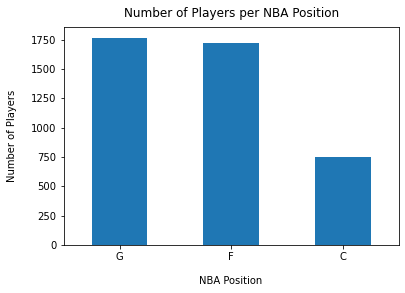

In [30]:
#position
nba['pos'].value_counts().plot(kind='bar', rot=0)
plt.xlabel("NBA Position", labelpad=14)
plt.ylabel("Number of Players", labelpad=14)
plt.title("Number of Players per NBA Position", y=1.02);

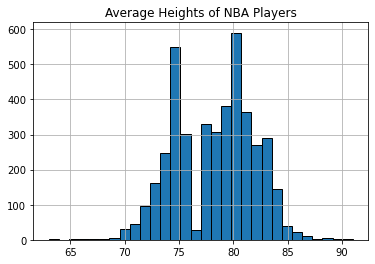

In [31]:
#height distribution
nba['height'].hist(bins=30, edgecolor='k')
plt.title('Average Heights of NBA Players');

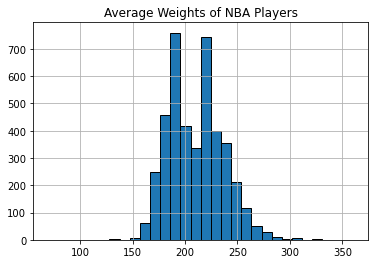

In [32]:
#weight distribution
nba['weight'].hist(bins=30, edgecolor='k')
plt.title('Average Weights of NBA Players');

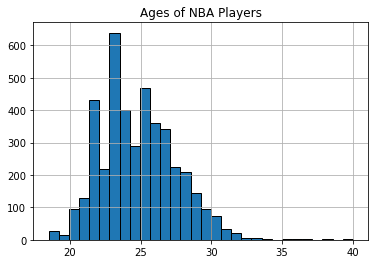

In [36]:
#age distribution
nba['age'].hist(bins=30, edgecolor='k')
plt.title('Ages of NBA Players');

<u>variable distributions</u> <br>
<b>normal distribution:</b> height, weight, age,pf <br>
<b>skewed right distributions:</b> Minutes played, field goal, 3-point, 2-pint, free throw, offensive rebound, defensive rebound, total rebound, assists, steals, blocks, points, and turnovers  

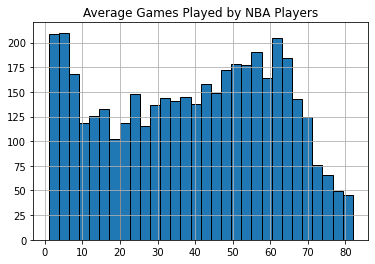

In [33]:
#games played distribution
nba['g'].hist(bins=30, edgecolor='k')
plt.title('Average Games Played by NBA Players');

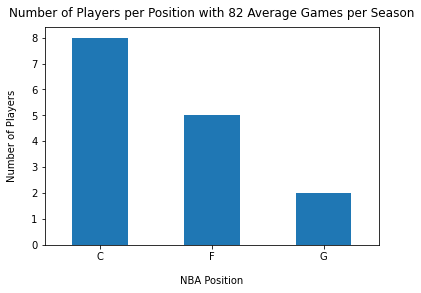

In [34]:
nba[nba['g']==82].groupby('pos')['pts'].count().plot(kind='bar',rot=0)
plt.xlabel("NBA Position", labelpad=14)
plt.ylabel("Number of Players", labelpad=14)
plt.title("Number of Players per Position with 82 Average Games per Season", y=1.02);

Games Played has a <b>bimodal distribution</b> with peaks at 0-5 games and 60-65 games. 605 players played less than 10 games. 50% of players played between 1 and 41 games. 15 players played the max 82 games per season on average. 8/15 players were Centers, 5/15 were Forwards, and 2/15 were Guards.

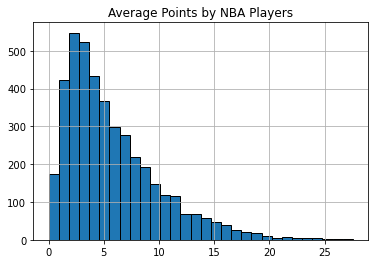

In [48]:
#pts  distribution
nba['pts'].hist(bins=30, edgecolor='k')
plt.title('Average Points by NBA Players');

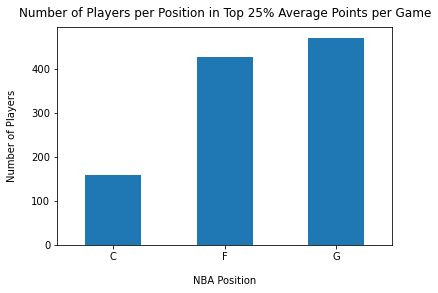

In [37]:
nba[nba['pts']>7.85].groupby('pos')['pts'].count().plot(kind='bar',rot=0)
plt.xlabel("NBA Position", labelpad=14)
plt.ylabel("Number of Players", labelpad=14)
plt.title("Number of Players per Position in Top 25% Average Points per Game", y=1.02);

Points is skewed right with 75% of players averaging 0-7 pts per game. The top 1st percentile averages 19.5-27.57 points per game. LeBron James (Forward) has the highest average points per game. Majority guards and forwards in top 1st percentile. 

In [38]:
print("10th percentile of pts : ", np.percentile(nba['pts'], 99))

10th percentile of pts :  19.4672380952381


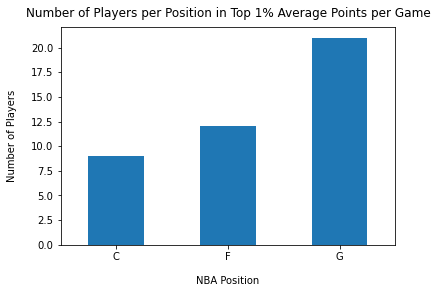

In [39]:
nba[nba['pts']>19.5].groupby('pos')['pts'].count().plot(kind='bar',rot=0)
plt.xlabel("NBA Position", labelpad=14)
plt.ylabel("Number of Players", labelpad=14)
plt.title("Number of Players per Position in Top 1% Average Points per Game", y=1.02);

Only 42 players average over 19.5 points per game (top 1%) and almost half (20/42) of them are guards. 

## Bivarate Analysis

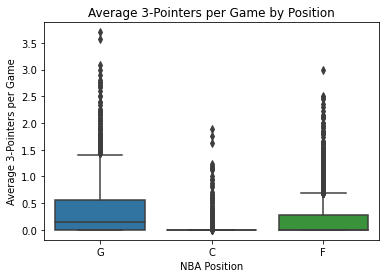

In [40]:
#Position vs Avg 3-points per game
sns.boxplot(x='pos', y='3p', data=nba)
plt.title('Average 3-Pointers per Game by Position')
plt.xlabel('NBA Position')
plt.ylabel('Average 3-Pointers per Game');

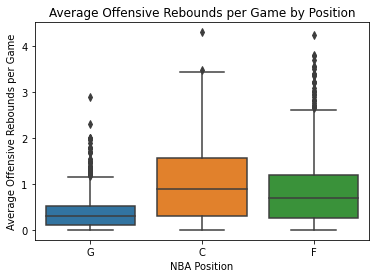

In [41]:
#Position vs Offensive Rebounds
sns.boxplot(x='pos', y='orb', data=nba)
plt.title('Average Offensive Rebounds per Game by Position')
plt.xlabel('NBA Position')
plt.ylabel('Average Offensive Rebounds per Game');

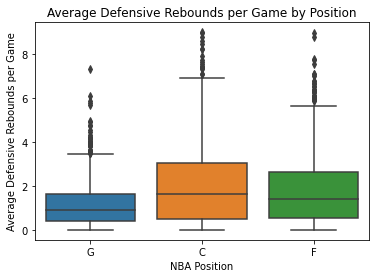

In [42]:
#Position vs Defensive Rebounds
sns.boxplot(x='pos', y='drb', data=nba)
plt.title('Average Defensive Rebounds per Game by Position')
plt.xlabel('NBA Position')
plt.ylabel('Average Defensive Rebounds per Game');

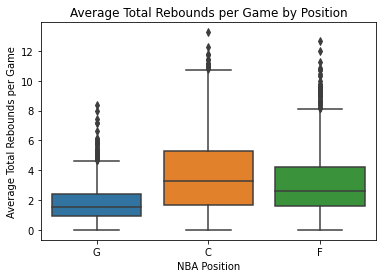

In [43]:
#Position vs Total Rebounds
sns.boxplot(x='pos', y='trb', data=nba)
plt.title('Average Total Rebounds per Game by Position')
plt.xlabel('NBA Position')
plt.ylabel('Average Total Rebounds per Game');

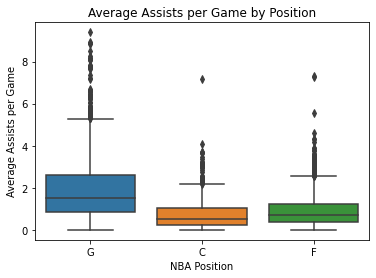

In [44]:
#Position vs Assist per Game
sns.boxplot(x='pos', y='ast', data=nba)
plt.title('Average Assists per Game by Position')
plt.xlabel('NBA Position')
plt.ylabel('Average Assists per Game');

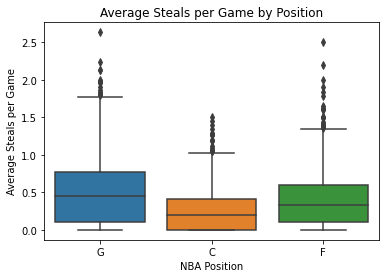

In [49]:
#Position vs Avg Steals per Game
sns.boxplot(x='pos', y='stl', data=nba)
plt.title('Average Steals per Game by Position')
plt.xlabel('NBA Position')
plt.ylabel('Average Steals per Game');

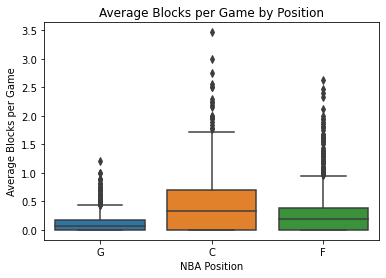

In [46]:
#Position vs Avg Blocks per Game
sns.boxplot(x='pos', y='blk', data=nba)
plt.title('Average Blocks per Game by Position')
plt.xlabel('NBA Position')
plt.ylabel('Average Blocks per Game');

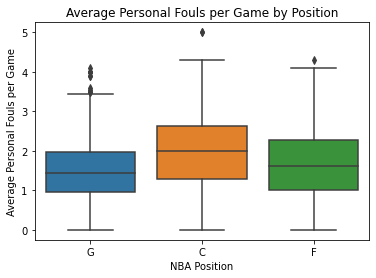

In [47]:
#Position vs Avg Personal Fouls per Game
sns.boxplot(x='pos', y='pf', data=nba)
plt.title('Average Personal Fouls per Game by Position')
plt.xlabel('NBA Position')
plt.ylabel('Average Personal Fouls per Game');

<b>Similarities across Position:</b> <br>
Average and range of <b>points, games played, minutes played, 2-pointers, free throws, and turnovers</b> is very similar across each position. 

<b>Differences:<b> <br>
* Centers have the highest rebounds, blocks and Guards have the lowest. 
* Guards have the highest Assists, 3p and Centers have the lowest assists, 3p. 
* Centers have the lowest Steals with Guards and Fowards covering a wider range and higher average. 
* Centers have the highest personal fouls with Guards and Forwards sharing similar averages